<a href="https://colab.research.google.com/github/lauBit/relacion-minutos-ingreso/blob/main/RelacionMinutos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 1 – Relación Minutos Ingreso**


Integrantes:
- Paola Romero
- Daniel Garcia
- Fernando Montaño
- Laura Camelo

# **Descripción del problema**

Se quiere analizar si hay una relación entre el total de minutos usados con la compañia y el ingreso total de los clientes.

# **Descripción de las variables de la base.**

`totrev`: Ingresos del cliente.

`totmou`: Total de minutos usados por el cliente.

`creditcd`: Indicador de tarjeta de crédito.

`eqpdays`: Número de días (antigüedad) del equipo actual.

> Agregar bloque entrecomillado



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv'
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


In [ ]:
df.describe()

,totmou,totrev,eqpdays,Customer_ID
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,7692.804866,1042.133807,386.794500,1.049965e+06
std,8657.917883,857.144895,252.720196,2.879424e+04
min,0.000000,11.100000,-5.000000,1.000014e+06
25%,2576.000000,526.787500,210.000000,1.025053e+06
50%,5262.000000,820.235000,338.000000,1.049652e+06
75%,9823.250000,1272.975000,522.000000,1.074798e+06
max,163264.176700,13426.600000,1823.000000,1.099992e+06


# **Tratamiento de valores nulos**

*   Se identifica la existencia de valores vacíos en la columna `creditcd`
*   Se realiza la limpieza de los valores negativos y ceros en la columna `eqpdays`
*   Se asignan todos los valores depurados en el dataframe: `df_final`


In [ ]:
df_filtered = df[(df['creditcd'].notna()) & (df['eqpdays'] > 0)]

df_final = df_filtered[['totmou', 'totrev', 'creditcd', 'eqpdays']]


# **Crear algunos gráficos que evidencien la relación entre minutos y el ingreso de los clientes.**

<Axes: >

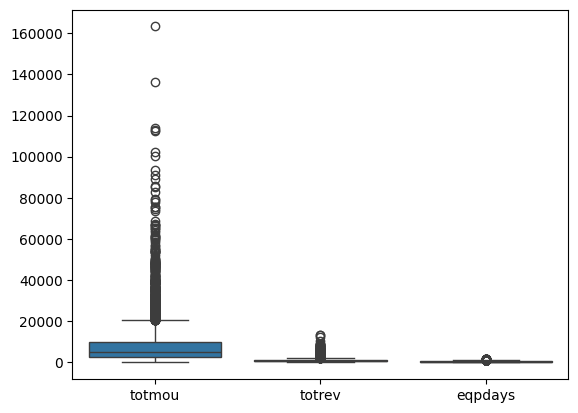

In [ ]:
sns.boxplot(df_final)

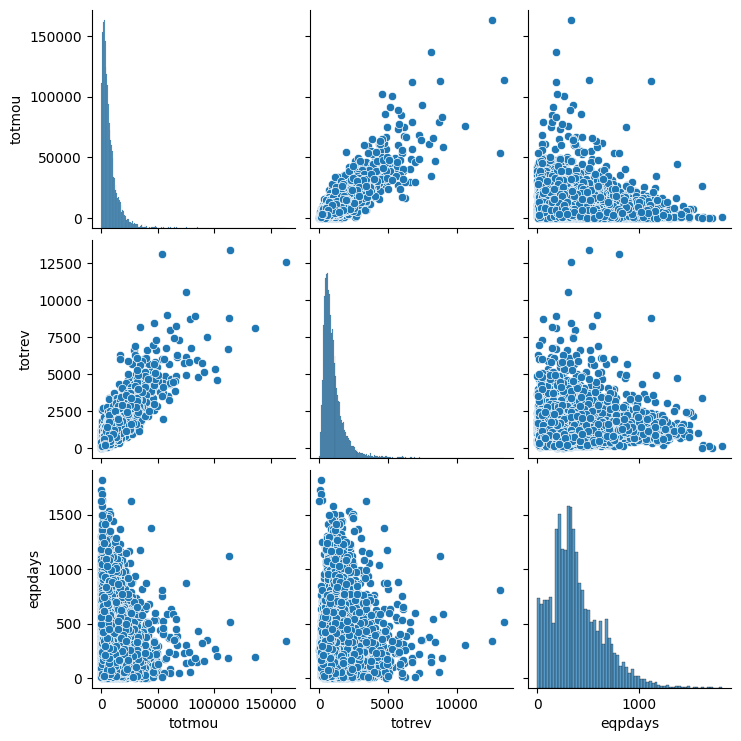

In [ ]:
sns.pairplot(data=df_final)

**5. Hagan un diagrama de dispersión entre las variables totrev y totmou. Posterior a la realización de este gráfico desarrolle una conclusión.**

In [ ]:
x = df_final['totmou']
y = df_final['totrev']


Text(0, 0.5, 'Frecuencia')

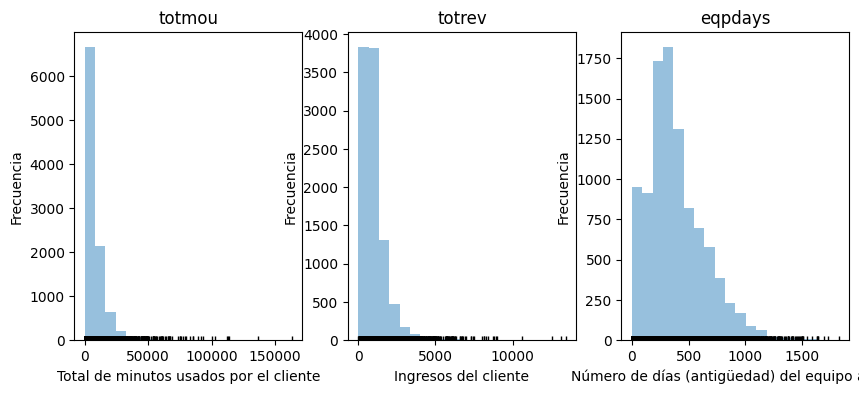

In [ ]:
# Gráfico distribución variables
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

axs[0].hist(x=df_final.totmou, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(df_final.totmou, np.full_like(df_final.totmou, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('totmou')
axs[0].set_xlabel('Total de minutos usados por el cliente')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(x=df_final.totrev, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(df_final.totrev, np.full_like(df_final.totrev, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('totrev')
axs[1].set_xlabel('Ingresos del cliente')
axs[1].set_ylabel('Frecuencia')

axs[2].hist(x=df_final.eqpdays, bins=20, color="#3182bd", alpha=0.5)
axs[2].plot(df_final.eqpdays, np.full_like(df_final.eqpdays, -0.01), '|k', markeredgewidth=1)
axs[2].set_title('eqpdays')
axs[2].set_xlabel('Número de días (antigüedad) del equipo actual')
axs[2].set_ylabel('Frecuencia')

creditcd
Y    6780
N    3046
Name: count, dtype: int64


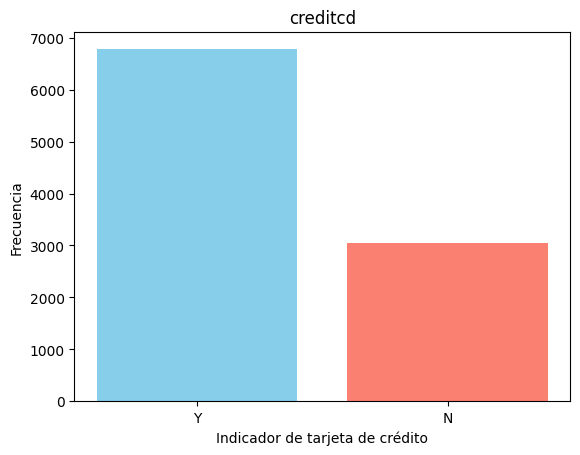

In [ ]:
# Frecuencia de cada valor en la columna
frecuencia = df_final['creditcd'].value_counts()
print(frecuencia)

# Se crea gráfico de barras
plt.bar(frecuencia.index, frecuencia.values, color=['skyblue', 'salmon'])

plt.xlabel('Indicador de tarjeta de crédito')
plt.ylabel('Frecuencia')
plt.title('creditcd')

plt.show()

**6. Hagan un diagrama de dispersión entre las variables totrev y totmou. Posterior a la realización de este gráfico desarrolle una conclusión.**

In [ ]:
# Se calcula el coeficiente de determinación (R cuadrado)
corr_coef = np.corrcoef(x, y)[0, 1]
print(corr_coef)

0.8358451421598303


Text(0.5, 1.0, 'Grafico de dispersión')

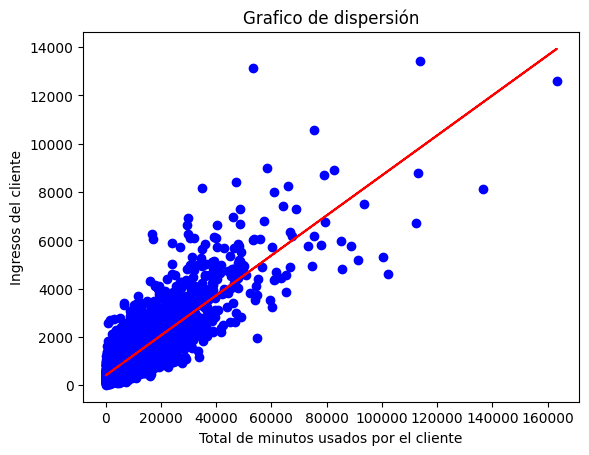

In [ ]:
r_squared = corr_coef**2
mean_x = np.mean(x)
mean_y = np.mean(y)

# Se calcula la pendiente y la intersección de la recta de mínimos cuadrados
m = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x)**2)

b = mean_y - m * mean_x

# Se calcula el error estándar
y_pred = m * x + b

error_std = np.sqrt(np.sum((y - y_pred)**2) / (len(x) - 2))
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, y_pred, color='red', label='Recta de mínimos cuadrados')

plt.xlabel('Total de minutos usados por el cliente')
plt.ylabel('Ingresos del cliente')
plt.title('Grafico de dispersión')

**7. ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?**

Sí, una vez calculado el coeficiente de correlación entre las variables `totmou` (Total de minutos usados por el cliente) y `totrev` (Ingresos del cliente), evidenciamos una correlación positiva de alta intensidad lo cual nos indica que cuando una variable aumenta la otra igual, por lo tanto se concluye que las dos variables se encuentran altamente relacionadas.



**8. El hecho de tener crédito afecta alguna de estas dos variables, compruébenlo incluyendo en el diagrama de dispersión una leyenda que indique si tiene crédito o no**




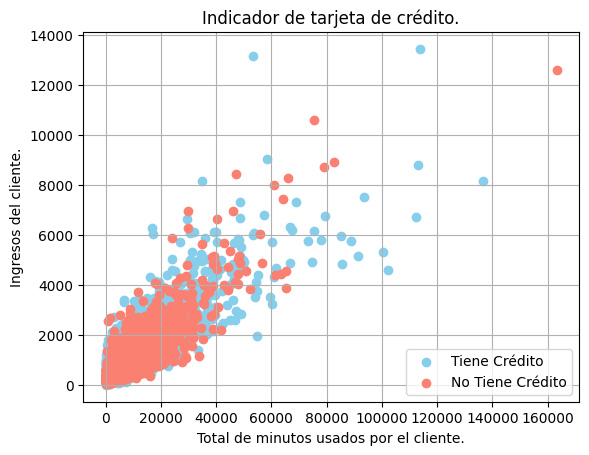

In [ ]:
# Filtrar los datos para cada grupo basado en 'creditcd'
df_credito = df_final[df_final['creditcd'] == 'Y']
df_no_credito = df_final[df_final['creditcd'] == 'N']

# Extraer los valores de 'totmou' y 'totrev' para cada grupo
x_credito = df_credito['totmou']
y_credito = df_credito['totrev']
x_no_credito = df_no_credito['totmou']
y_no_credito = df_no_credito['totrev']

# Crear el gráfico de dispersión con colores diferentes para cada categoría
plt.scatter(x_credito, y_credito, color='skyblue', label='Tiene Crédito')
plt.scatter(x_no_credito, y_no_credito, color='salmon', label='No Tiene Crédito')

# Añadir etiquetas y título
plt.xlabel('Total de minutos usados por el cliente.')
plt.ylabel('Ingresos del cliente.')
plt.title('Indicador de tarjeta de crédito.')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

Podemos observar que aquellos clientes que no poseen créditos, presentan una disminución considerable en relación al total de minutos usados